In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [8]:
df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [9]:
x_train = df.drop('dangerous', axis=1)

In [10]:
y_train = df.dangerous

In [11]:
rf = RandomForestClassifier(random_state=0)

In [12]:
params = {
    'n_estimators' : range(10, 50, 10),
    'max_depth' : range(1, 13),
    'min_samples_leaf' : range(1, 10),
    'min_samples_split' : range(2, 10, 2)
}

In [13]:
rand_cv_rf = RandomizedSearchCV(rf, params, cv=5)

In [14]:
rand_cv_rf.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'max_depth': range(1, 13),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(10, 50, 10)})

In [15]:
rand_cv_rf.best_params_

{'n_estimators': 20,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [16]:
best_rf = rand_cv_rf.best_estimator_

In [17]:
fimp = pd.DataFrame(best_rf.feature_importances_,
                    index=x_train.columns, columns=['importance']) \
                    .sort_values('importance', ascending=False)

<AxesSubplot:xlabel='importance'>

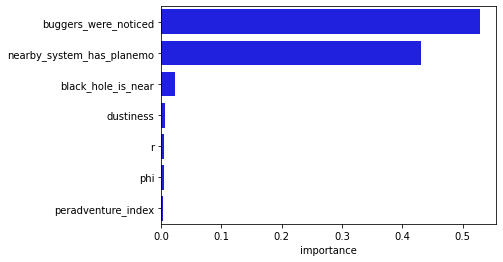

In [18]:
sns.barplot(x="importance", y=fimp.index, data=fimp,
            label="Feature importances", color="b")